In [ ]:
!pip install yfinance
import yfinance as yf
import requests
import pandas as pd

C:\Users\Karuna\anaconda3\ANACONDA_NEW\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
companies = {'Boustead Singapore Limited':'F9D.SI',
                    'CapitaLand':'C38U.SI',
                    'China Aviation Oil':'VZ8.HM',
                    'ComfortDelGro':'C52.SI',
                    'Fraser and Neave':'FNEVY',
                    'Genting Singapore':'GIGNY',
                    'Golden Agri-Resources':'GARPY',
                    'Grab':'GRAB',
                    'NETS':'NTWK',
                    'OCBC Bank':'O39.SI',
                    'Renewable Energy Corporation':'RNWR',
                    'SATS Ltd':'S58.SI',
                    'SBS Transit': 'S61.SI',
                    'SembCorp Marine':'S8N.SG',
                    'SIA Engineering Company':'S59.SI',
                    'Singapore Airlines':'SINGY',
                    'Singapore Exchange':'SPXCY',
                    'Singapore Post':'SPSTY',
             'Singapore Technologies Engineering Ltd':'S63.SI',
             'StarHub':'SRHBF',
             'Thakral Corporation':'AWI.SI',
             'Yeo Hiap Seng':'Y03.SI',
             'Wilmar':'F34.SI'
                    }

In [ ]:
len(companies)

23

## Function to get news using newsapi and yfinance API

In [ ]:
def get_data():
    df = pd.DataFrame({'symbol': [],'company_name': [], 'news': []})
    API_KEY = '199b21c860a5466fbf8f53f894d0af3c'
    for k, v in companies.items():
        company_symbol = v
        url = f'https://newsapi.org/v2/everything?q={company_symbol}&sortBy=publishedAt&apiKey={API_KEY}'
        response = requests.get(url).json()
        articles = response['articles'][:8]

        for art in articles:
            title = art.get('title', None)
            new_row = pd.Series({'symbol': v, 'company_name': k, 'news': title })
            df = pd.concat([df, new_row.to_frame().T], ignore_index=True)
        if response['totalResults'] <=3:
            t = yf.Ticker(v)
            news = t.get_news()
            for article in news:
                title = article["title"]
                new_row = pd.Series({'symbol': v, 'company_name': k, 'news': title })

                df = pd.concat([df, new_row.to_frame().T], ignore_index=True)
    return df

df = get_data()

# savinf it into a csv file
df.to_csv('company_news.csv', sep=",")


In [ ]:
df = pd.read_csv('company_news.csv')
df


,Unnamed: 0,symbol,company_name,news
0,0,F9D.SI,Boustead Singapore Limited,Q4 2023 ProPetro Holding Corp Earnings Call
1,1,F9D.SI,Boustead Singapore Limited,"BOJ to scrap negative interest rates in April,..."
2,2,F9D.SI,Boustead Singapore Limited,Exclusive-Reddit in AI content licensing deal ...
3,3,F9D.SI,Boustead Singapore Limited,Q4 2023 Travel + Leisure Co Earnings Call
4,4,F9D.SI,Boustead Singapore Limited,Q4 2023 Diamondback Energy Inc Earnings Call
...,...,...,...,...
140,140,Y03.SI,Yeo Hiap Seng,Drifting with purpose: sports car enthusiasts ...
141,141,F34.SI,Wilmar,Android 15 para móviles Samsung: todos los mod...
142,142,F34.SI,Wilmar,"Android 15: novedades, móviles compatibles, fe..."
143,143,F34.SI,Wilmar,Ecco quali dispositivi Samsung dovrebbero rice...


In [ ]:
df.shape

(145, 4)

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,symbol,company_name,news
0,F9D.SI,Boustead Singapore Limited,Q4 2023 ProPetro Holding Corp Earnings Call
1,F9D.SI,Boustead Singapore Limited,"BOJ to scrap negative interest rates in April,..."
2,F9D.SI,Boustead Singapore Limited,Exclusive-Reddit in AI content licensing deal ...
3,F9D.SI,Boustead Singapore Limited,Q4 2023 Travel + Leisure Co Earnings Call
4,F9D.SI,Boustead Singapore Limited,Q4 2023 Diamondback Energy Inc Earnings Call


In [ ]:
# importing essential packages for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
def text_cleaning(text):
    # Text splitting
    text_splitting = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in text_splitting if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    result = ' '.join(lemmatized_tokens)
    return result

In [ ]:
cleaned_news = []
for news in df['news']:
    cleaned_news.append(text_cleaning(news))
cleaned_news = pd.Series(cleaned_news)

In [ ]:
df['cleaned_news'] = cleaned_news
df.head()

,symbol,company_name,news,cleaned_news
0,F9D.SI,Boustead Singapore Limited,Q4 2023 ProPetro Holding Corp Earnings Call,q4 2023 propetro holding corp earnings call
1,F9D.SI,Boustead Singapore Limited,"BOJ to scrap negative interest rates in April,...","boj scrap negative interest rate april , say 8..."
2,F9D.SI,Boustead Singapore Limited,Exclusive-Reddit in AI content licensing deal ...,exclusive-reddit ai content licensing deal goo...
3,F9D.SI,Boustead Singapore Limited,Q4 2023 Travel + Leisure Co Earnings Call,q4 2023 travel + leisure co earnings call
4,F9D.SI,Boustead Singapore Limited,Q4 2023 Diamondback Energy Inc Earnings Call,q4 2023 diamondback energy inc earnings call


In [ ]:
def get_sentiment_score(text):
    score_calculation = SentimentIntensityAnalyzer()
    scores = score_calculation.polarity_scores(text)
    if scores['pos'] > scores['neg']:
        if scores['pos'] > scores['neu']:
            return 'positive'
        else:
            return 'neutral'
    else:
        return 'negetive'

scores = []
for t in df['cleaned_news']:
    scores.append(get_sentiment_score(t))

In [ ]:
df['scores'] = pd.Series(scores)

df.head()

## Testing

In [ ]:
testing_news_list=["Remarkable recovery: injured athlete returns to competition stronger than ever.",
                   "Environmental disaster pollutes major waterway, endangering wildlife.",
                  "This product is okay. It could be better.",
                  "Survey reveals public opinion on current political issues."]

#looping through each value in the list and calling the get_sentiment_score function
for i in testing_news_list:
    score=get_sentiment_score(i)
    print(f'{i}: {score}')

Remarkable recovery: injured athlete returns to competition stronger than ever.: neutral
Environmental disaster pollutes major waterway, endangering wildlife.: negetive
This product is okay. It could be better.: neutral
Survey reveals public opinion on current political issues.: negetive



## visualization

In [ ]:
# plotting the count of sentiments (three different types)
import matplotlib.pyplot as plt

In [ ]:
sentiment_count = df['scores'].value_counts()

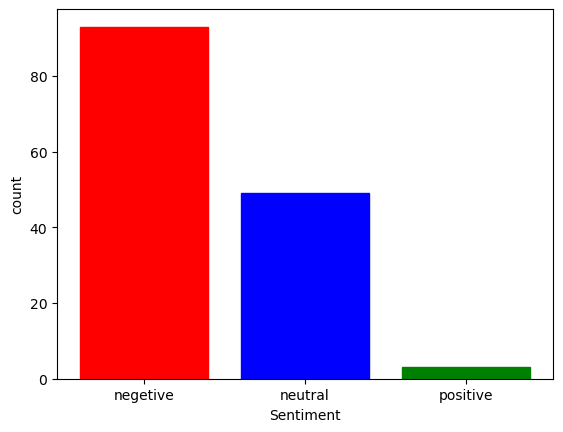

In [ ]:
bars=plt.bar(sentiment_count.keys(), sentiment_count)
plt.ylabel('count')
plt.xlabel('Sentiment')
bars[0].set_color('red')
bars[1].set_color('blue')
bars[2].set_color('green')
plt.show()

In [ ]:
df.groupby(['company_name', 'scores'])[['scores']].count()

scores
company_name                           scores          
Boustead Singapore Limited             negetive       6
                                       neutral        2
CapitaLand                             negetive       6
                                       neutral        2
China Aviation Oil                     negetive       6
                                       neutral        2
ComfortDelGro                          negetive       6
                                       neutral        2
Fraser and Neave                       negetive       7
                                       neutral        1
Genting Singapore                      negetive       2
                                       neutral        2
Golden Agri-Resources                  negetive       1
Grab                                   negetive       5
                                       neutral        3
NETS                                   negetive       6
                                       neutral        1
OCBC Bank                              negetive       6
                                       neutral        2
SATS Ltd                               negetive       6
                                       neutral        2
SBS Transit                            negetive       4
SIA Engineering Company                negetive       6
                                       neutral        2
SembCorp Marine                        negetive       6
                                       neutral        2
Singapore Airlines                     negetive       5
                                       neutral        4
                                       positive       1
Singapore Exchange                     negetive       5
                                       neutral        1
                                       positive       1
Singapore Post                         neutral        1
Singapore Technologies Engineering Ltd negetive       6
                                       neutral        2
StarHub                                negetive       3
                                       neutral        1
Thakral Corporation                    negetive       6
                                       neutral        2
Wilmar                                 negetive       7
                                       neutral        2
Yeo Hiap Seng                          negetive       6
                                       neutral        2

In [ ]:
df.to_csv('sentiment_data.csv')